In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Functions_IPM import run_year_i, run_year_f, run_year_n
from Functions_base import t_growing, k, T87, Temerge, T61, ic_base
from Functions_analysis import Y
from Functions_plotting import plot_one_farm_type, c2, c3, c4, plot_one_field
import seaborn as sns

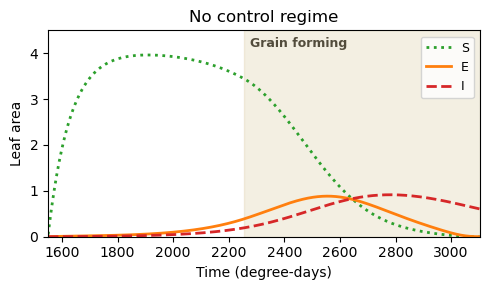

In [2]:
# Plot no control
pop_n = run_year_n(ic_base)
fig,ax = plot_one_farm_type(pop_n, 'n')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_nocontrolregime.pdf', dpi=400)

/tmp/ipykernel_30261/1448871445.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


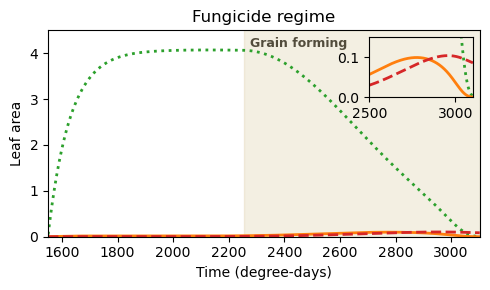

In [3]:
# Plot fungicide
pop_f = run_year_f(ic_base)
fig,ax = plot_one_farm_type(pop_f, 'f')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_fungicideregime.pdf', dpi=400)

/tmp/ipykernel_30261/1320527005.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


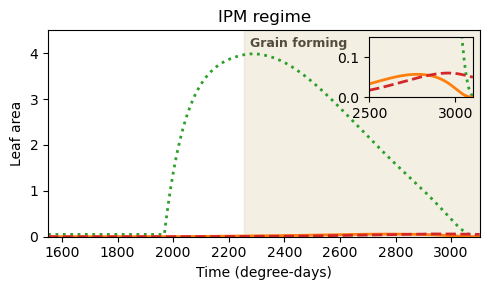

In [4]:
# Plot IPM
# IPM parameters
r_beta = 0.976
sow_delay = 30
prop_debris = 0.1
debris_removal = 0.154
biocontrol_dates = [31,39] #Or some subset thereof
pop_i = run_year_i(ic_base,r_beta,sow_delay,prop_debris,debris_removal,biocontrol_dates)
fig,ax = plot_one_farm_type(pop_i, 'i')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_ipmregime.pdf', dpi=400)

Peak percent infection
[0.22317164036251477, 0.02540923681052006, 0.014777185856543992]
Peak infection time
[2781, 2958, 2960]


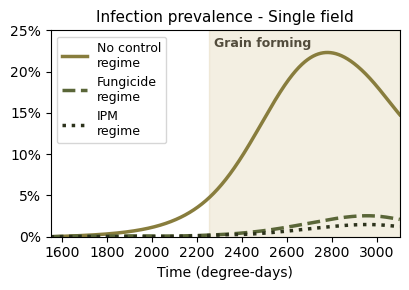

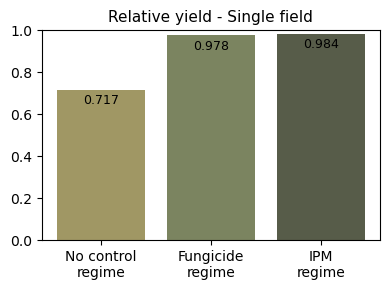

In [6]:
# Plot infection prevalence and yield figures
fig1,ax1,fig2,ax2 = plot_one_field([pop_n,pop_f,pop_i],["No control\nregime", "Fungicide\nregime", "IPM\nregime"],"Single field")
fig1.set_tight_layout(True)
fig2.set_tight_layout(True)
# Save figures
fig1.savefig('Figures/Manuscript_final/fig_singlefarminfection.pdf', dpi=400)
fig2.savefig('Figures/Manuscript_final/fig_singlefarmyields.pdf', dpi=400)